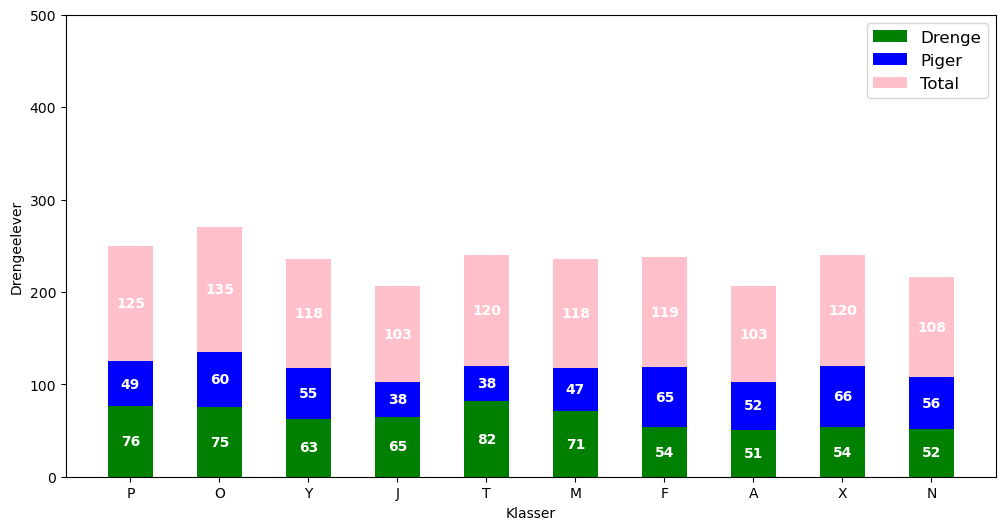

In [1]:
#https://www.kaggle.com/code/shresthapriya/tutorial-subplot-pie-chart-and-bars

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Generate sample data
classes = np.array([chr(num) for num in range(65,91)])
np.random.shuffle(classes)
classes = classes[:10]

total = np.random.randint(100, 200, 10)
boys = np.random.randint(50, 100, 10)
girls = total - boys

passed_boys = []
for num_boys in boys:
    passed_boys.append(np.random.randint(0, num_boys))

passed_girls = []
for num_girls in girls:
    passed_girls.append(np.random.randint(0,num_girls))

failed_boys = boys - passed_boys
failed_girls = girls - passed_girls
dumpet_procent = (((failed_boys + failed_girls) * 100) / total).round(2)
beståede_procent = 100 - dumpet_procent


# Create DataFrame
df = pd.DataFrame({'Klasser': classes,
                   'Drenge': boys,
                   'Piger': girls,
                   'Total': total})

df['Bestået drenge'] = passed_boys
df['Bestået piger'] = passed_girls
df['Dumpede drenge'] = failed_boys
df['Dumpede piger'] = failed_girls
df['Beståede i %'] = beståede_procent
df['Dumpede i %'] = dumpet_procent

plt.subplots(figsize=(12, 6))

bars = []  # Store the bars for later reference

ttl = plt.bar(classes, df['Drenge'], label='Drenge', color='g', width=0.5)
bars.append(ttl)
b = plt.bar(classes, df['Piger'], bottom=df['Drenge'], label='Piger', color='b', width=0.5)
bars.append(b)
g = plt.bar(classes, df['Total'], bottom=df['Drenge'] + df['Piger'], label='Total', color='pink', width=0.5)
bars.append(g)

# Loop through the bars and add labels
for bar in bars:
    plt.bar_label(bar, label_type='center', color='w', weight='bold')
    
plt.legend(loc='upper right', fontsize=12)
plt.ylim(0,500)
plt.xlabel('Klasser')
plt.ylabel('Drengeelever')


plt.show()


In [3]:
df

,Klasser,Drenge,Piger,Total,Bestået drenge,Bestået piger,Dumpede drenge,Dumpede piger,Beståede i %,Dumpede i %
0,P,76,49,125,23,44,53,5,53.60,46.40
1,O,75,60,135,64,51,11,9,85.19,14.81
2,Y,63,55,118,4,29,59,26,27.97,72.03
3,J,65,38,103,59,32,6,6,88.35,11.65
4,T,82,38,120,4,23,78,15,22.50,77.50
5,M,71,47,118,67,13,4,34,67.80,32.20
6,F,54,65,119,39,46,15,19,71.43,28.57
7,A,51,52,103,42,29,9,23,68.93,31.07
8,X,54,66,120,14,7,40,59,17.50,82.50
9,N,52,56,108,48,23,4,33,65.74,34.26


In [4]:
winner = df[df['Beståede i %'] == df['Beståede i %'].max()]

In [5]:
print(f'Den bedste klasse er:', winner.index[0])

Den bedste klasse er: 3


In [7]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
aggfunc = {
    'Drenge': 'sum',
    'Piger': 'sum',
    'Total': 'sum',
    'Bestået drenge': 'sum',
    'Bestået piger': 'sum',
    'Dumpede drenge': 'sum',
    'Dumpede piger': 'sum',
    'Beståede i %': 'mean',
    'Dumpede i %': 'mean'

}

pv_table = pd.pivot_table(df, values=list(aggfunc.keys()), index=df.Klasser, aggfunc=aggfunc, margins=True)
pv_table


,Beståede i %,Bestået drenge,Bestået piger,Drenge,Dumpede drenge,Dumpede i %,Dumpede piger,Piger,Total
Klasser,,,,,,,,,
A,68.930,42,29,51,9,31.070,23,52,103
F,71.430,39,46,54,15,28.570,19,65,119
J,88.350,59,32,65,6,11.650,6,38,103
M,67.800,67,13,71,4,32.200,34,47,118
N,65.740,48,23,52,4,34.260,33,56,108
O,85.190,64,51,75,11,14.810,9,60,135
P,53.600,23,44,76,53,46.400,5,49,125
T,22.500,4,23,82,78,77.500,15,38,120
X,17.500,14,7,54,40,82.500,59,66,120


In [9]:
ordered_columns = list(aggfunc.keys()) + ['All']
ordered_columns

['Drenge',
 'Piger',
 'Total',
 'Bestået drenge',
 'Bestået piger',
 'Dumpede drenge',
 'Dumpede piger',
 'Beståede i %',
 'Dumpede i %',
 'All']

In [14]:
pv_table = pv_table.reindex(columns=ordered_columns)

pv_table.drop(columns='All').reset_index()


,Klasser,Drenge,Piger,Total,Bestået drenge,Bestået piger,Dumpede drenge,Dumpede piger,Beståede i %,Dumpede i %
0,A,51,52,103,42,29,9,23,68.930,31.070
1,F,54,65,119,39,46,15,19,71.430,28.570
2,J,65,38,103,59,32,6,6,88.350,11.650
3,M,71,47,118,67,13,4,34,67.800,32.200
4,N,52,56,108,48,23,4,33,65.740,34.260
5,O,75,60,135,64,51,11,9,85.190,14.810
6,P,76,49,125,23,44,53,5,53.600,46.400
7,T,82,38,120,4,23,78,15,22.500,77.500
8,X,54,66,120,14,7,40,59,17.500,82.500
9,Y,63,55,118,4,29,59,26,27.970,72.030


In [12]:
df['Beståede i %'].mean()

56.900999999999996